<a href="https://colab.research.google.com/github/abhawaikar/Reproductive-Health-Statistics/blob/main/STOCK_PREDICTION_IN_SEM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q yfinance

The initial stage of the stock prediction process involves gathering and loading the necessary data into memory. This can be done by accessing financial market data from various sources, such as the Yahoo Finance website, which provides a wealth of resources and tools for identifying lucrative investment opportunities. In order to retrieve the data from Yahoo Finance, the yfinance library can be utilized, as it enables users to download market data in a threaded and Pythonic manner.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#read stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

#time stamps
from datetime import datetime
#tech stamps
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
#set start and end times
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
  company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.tail()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-09,105.480003,106.790001,105.160004,106.620003,106.620003,44089400,AMAZON
2023-05-10,108.099998,110.669998,108.050003,110.190002,110.190002,78627600,AMAZON
2023-05-11,111.029999,113.279999,110.489998,112.180000,112.180000,74924800,AMAZON
2023-05-12,112.160004,112.639999,109.320000,110.260002,110.260002,49810100,AMAZON
2023-05-15,111.150002,112.290001,109.250000,110.595001,110.595001,32401158,AMAZON


Upon reviewing the contents of our data, it is apparent that the data is primarily numerical, with the date serving as the index. It is worth noting that the records do not include weekends. While using globals() to set the DataFrame names may be considered a less than optimal approach, it is a straightforward method. Now that the data has been obtained, basic data analysis can be performed to assess its quality and accuracy.

In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,149.327977,151.378809,147.493413,149.522282,149.135293,7.984457e+07
std,10.688050,10.570717,10.811738,10.719579,10.702619,2.502268e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,2.006040e+07
25%,142.120003,143.987495,139.974998,142.472496,141.981434,6.409390e+07
50%,148.884995,150.930000,147.264999,149.375000,148.933762,7.486430e+07
75%,156.512501,158.277496,154.204994,156.792496,155.910637,8.900328e+07
max,173.750000,176.149994,173.119995,174.550003,173.995270,1.826020e+08


Descriptive Statistics about the Data
.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-04-21 to 2023-04-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


Information About the Data
.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

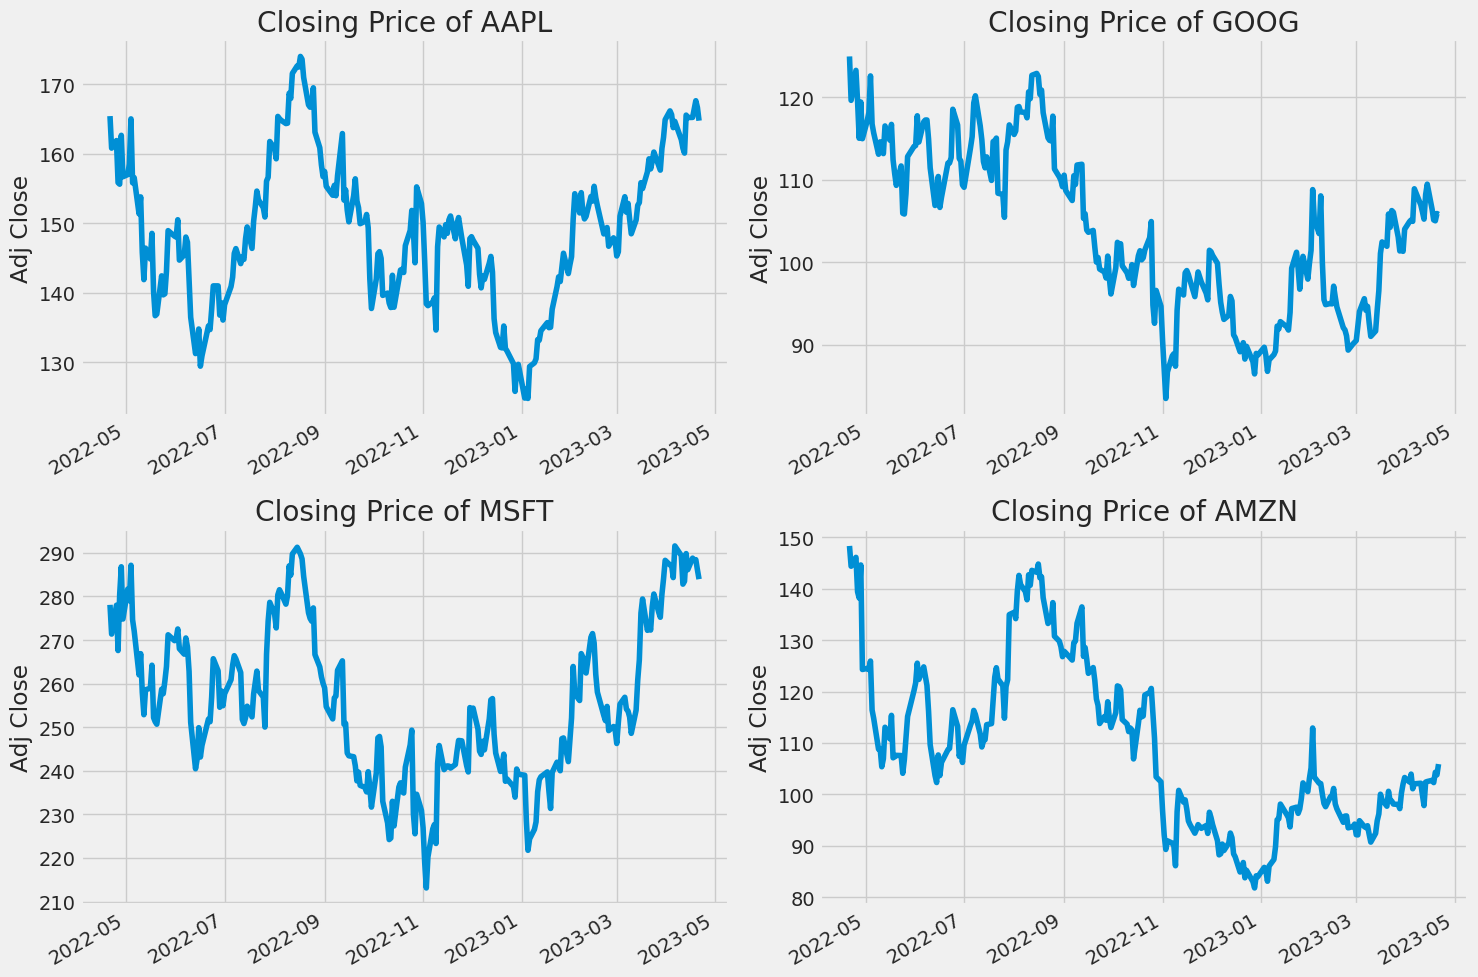

In [ ]:
#closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()

The closing price of a stock is the final price at which it is traded within a standard trading day. It serves as a standard reference point for investors to analyze the stock's performance over time. In essence, a stock's closing price is a key indicator that provides valuable insight into the stock's overall performance and its potential future trajectory.

Text(0.5, 1.0, 'AMAZON')

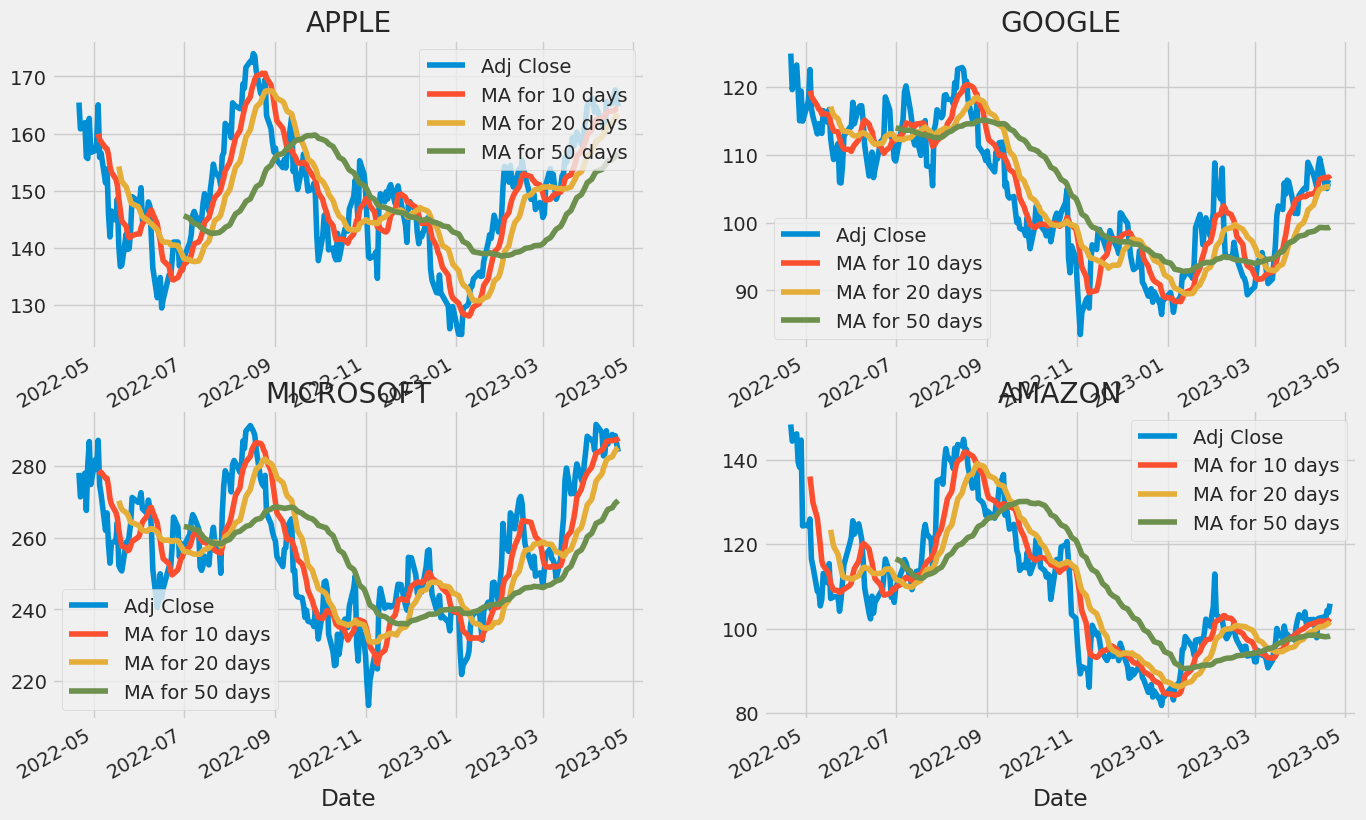

In [ ]:
#moving average of various stocks
ma_day = [10, 20, 50]
for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0, 0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0, 1].set_title('GOOGLE')
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1, 0].set_title('MICROSOFT')
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1, 1].set_title('AMAZON')

In the context of stock analysis, the moving average (MA) is a commonly used technical analysis tool that helps to smooth out price data by calculating a continuously updated average price. This average is calculated over a specific time period, which can vary based on the trader's preferences, such as 10 days, 20 minutes, or 30 weeks. Essentially, the moving average provides a representation of the average price of a stock over a given time period, which can help traders identify trends and make informed decisions about buying or selling the stock.

Text(0.5, 1.0, 'AMAZON')

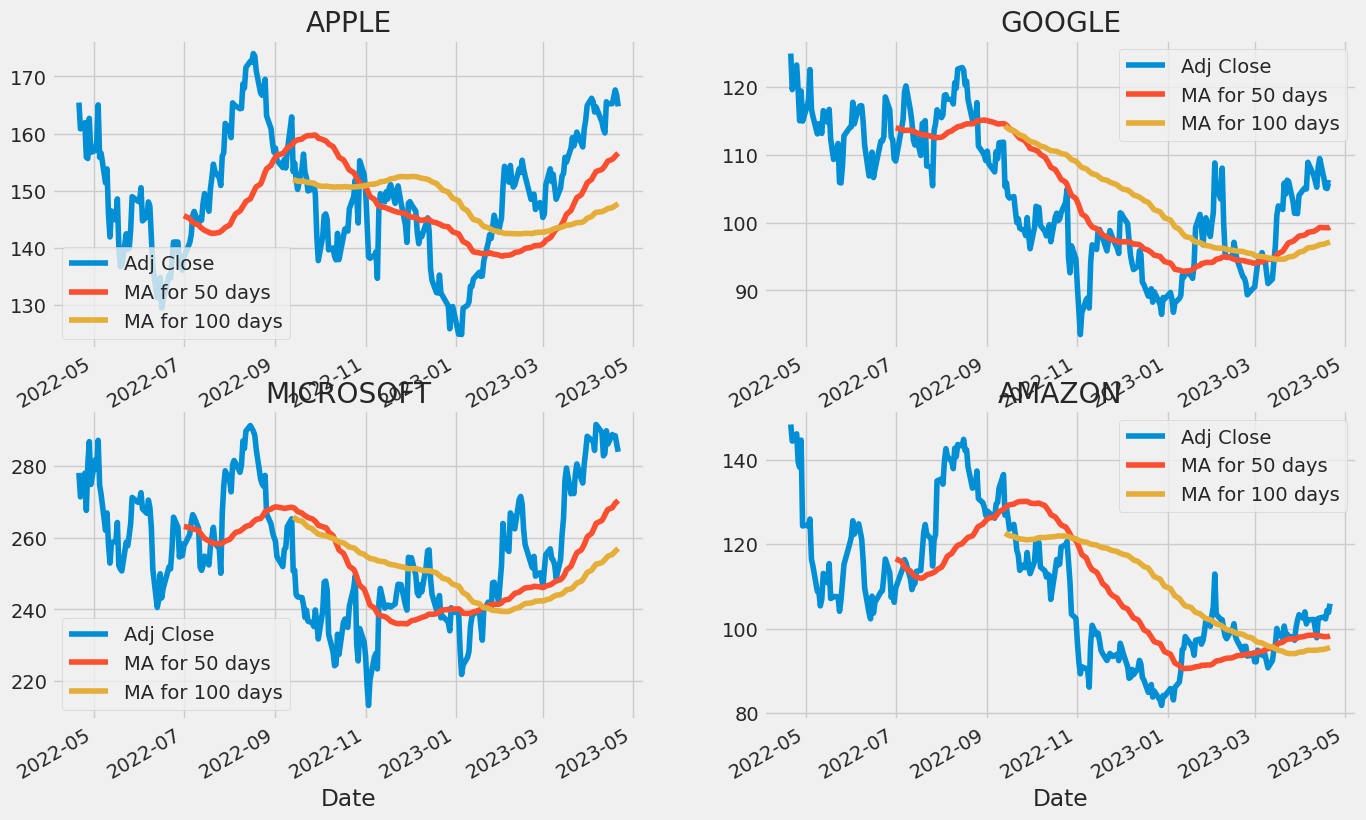

In [ ]:
#moving average of various stocks
ma_day = [50, 100]
for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 50 days','MA for 100 days']].plot(ax=axes[0,0])
axes[0, 0].set_title('APPLE')
GOOG[['Adj Close','MA for 50 days','MA for 100 days']].plot(ax=axes[0,1])
axes[0, 1].set_title('GOOGLE')
MSFT[['Adj Close','MA for 50 days','MA for 100 days']].plot(ax=axes[1,0])
axes[1, 0].set_title('MICROSOFT')
AMZN[['Adj Close','MA for 50 days','MA for 100 days' ]].plot(ax=axes[1,1])
axes[1, 1].set_title('AMAZON')


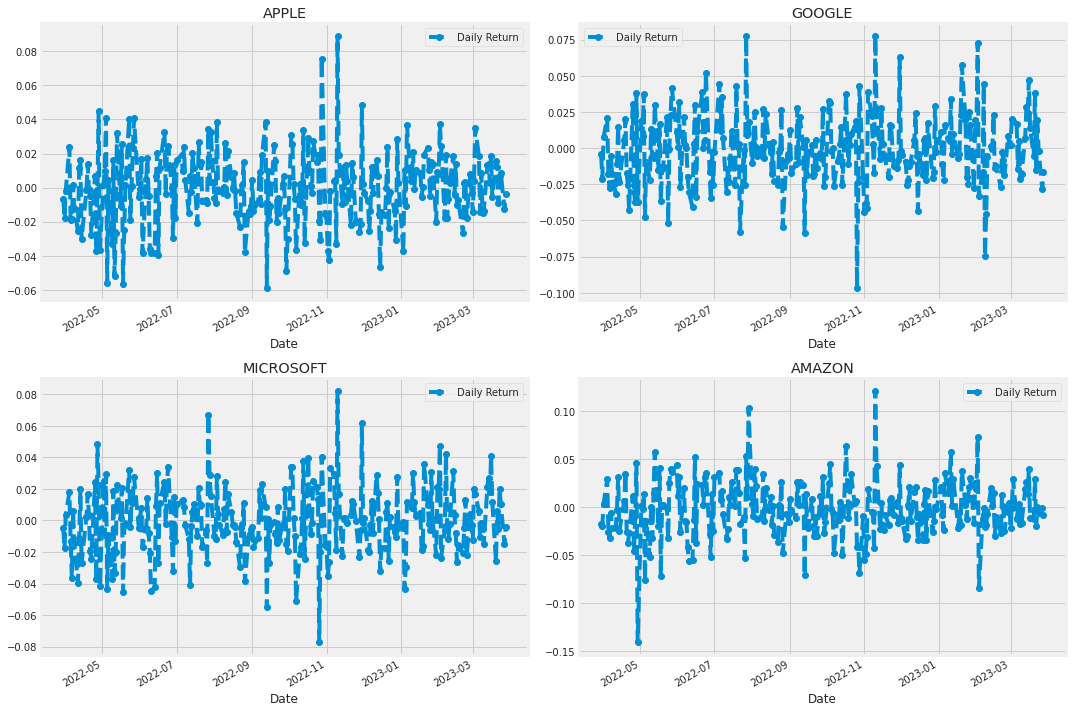

In [ ]:
#daily return of stock average
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax = axes[0, 0], legend = True, linestyle = '--', marker = 'o')
axes[0,0].set_title('APPLE')
GOOG['Daily Return'].plot(ax = axes[0, 1], legend = True, linestyle = '--', marker = 'o')
axes[0,1].set_title('GOOGLE')
MSFT['Daily Return'].plot(ax = axes[1, 0], legend = True, linestyle = '--', marker = 'o')
axes[1,0].set_title('MICROSOFT')
AMZN['Daily Return'].plot(ax = axes[1, 1], legend = True, linestyle = '--', marker = 'o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()



To further analyze the risk associated with a particular stock, it is necessary to examine its daily returns, rather than solely focusing on its absolute value. This can be achieved using pandas, which allows for the retrieval of daily return data for a stock. Daily returns refer to the percentage change in a stock's price from one trading day to the next, and can provide valuable insights into the level of risk associated with investing in that particular stock. By analyzing the average daily return of a stock, investors can gain a better understanding of its potential volatility and make more informed investment decisions.

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()
'''
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

#Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()
'''

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-21,NaN,NaN,NaN,NaN
2022-04-22,-0.027821,-0.026609,-0.042609,-0.024144
2022-04-25,0.006737,0.011943,0.030398,0.024414
2022-04-26,-0.037328,-0.045751,-0.030377,-0.037404
2022-04-27,-0.001467,-0.008781,-0.037534,0.048109


In [ ]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-21,NaN,NaN,NaN,NaN
2022-04-22,-0.027821,-0.026609,-0.042609,-0.024144
2022-04-25,0.006737,0.011943,0.030398,0.024413
2022-04-26,-0.037328,-0.045751,-0.030377,-0.037404
2022-04-27,-0.001467,-0.008781,-0.037534,0.048109


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define the pair of stocks to trade
stock1 = 'AAPL'
stock2 = 'MSFT'

# Download the historical prices for the two stocks
data1 = yf.download(stock1, start='2010-01-01', end='2023-03-17')
data2 = yf.download(stock2, start='2010-01-01', end='2023-03-17')

# Merge the two dataframes
data = pd.concat([data1['Adj Close'], data2['Adj Close']], axis=1)
data.columns = [stock1, stock2]

# Compute the spread between the two stocks
spread = data[stock1] - data[stock2]

# Compute the mean and standard deviation of the spread
mu = np.mean(spread)
sigma = np.std(spread)
# Define the entry and exit thresholds for the trade
entry_threshold = mu + 2 * sigma
exit_threshold = mu

# Initialize the position in the pair
position = 0

# Iterate over the historical data
for i in range(len(data)):
    # Compute the spread between the two stocks
    spread = data.iloc[i][stock1] - data.iloc[i][stock2]

    # If the spread crosses the entry threshold, enter the trade
    if spread > entry_threshold and position == 0:
        position = -1
        print("Short", stock1)
        print("Long", stock2)

    elif spread < -entry_threshold and position == 0:
        position = 1
        print("Long", stock1)
        print("Short", stock2)

    # If the spread crosses the exit threshold, exit the trade
    elif spread < exit_threshold and position == -1:
        position = 0
        print("Exit")

    elif spread > -exit_threshold and position == 1:
        position = 0
        print("Exit")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Long AAPL
Short MSFT


In [ ]:
#pair trading

import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download historical price data
aapl = yf.download('AAPL', start='2010-01-01', end='2023-03-17')
msft = yf.download('MSFT', start='2010-01-01', end='2023-03-17')

# Preprocess data
aapl['log_returns'] = np.log(aapl['Close']) - np.log(aapl['Close'].shift(1))
msft['log_returns'] = np.log(msft['Close']) - np.log(msft['Close'].shift(1))

aapl['norm_returns'] = (aapl['Close'] - aapl['Close'].mean()) / aapl['Close'].std()
msft['norm_returns'] = (msft['Close'] - msft['Close'].mean()) / msft['Close'].std()

# Combine data
data = pd.DataFrame({'aapl': aapl['log_returns'], 'msft': msft['log_returns']}).dropna()

# Split data into training and testing sets
train_data = data.iloc[:-100, :]
test_data = data.iloc[-100:, :]

# Train machine learning model
model = LinearRegression()
model.fit(train_data['msft'].values.reshape(-1, 1), train_data['aapl'])

# Test model
y_pred = model.predict(test_data['msft'].values.reshape(-1, 1))
mse = mean_squared_error(test_data['aapl'], y_pred)
print('MSE:', mse)

# Implement trading strategy
spread = data['aapl'] - model.predict(data['msft'].values.reshape(-1, 1))
mean_spread = spread.mean()
std_spread = spread.std()

buy_signal = spread > (mean_spread + std_spread)
sell_signal = spread < (mean_spread - std_spread)

# Place trades
for i in range(len(data)):
    if buy_signal.iloc[i]:
        print('Buy AAPL, Sell MSFT')
    elif sell_signal.iloc[i]:
        print('Sell AAPL, Buy MSFT')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
MSE: 0.00020968243503784894


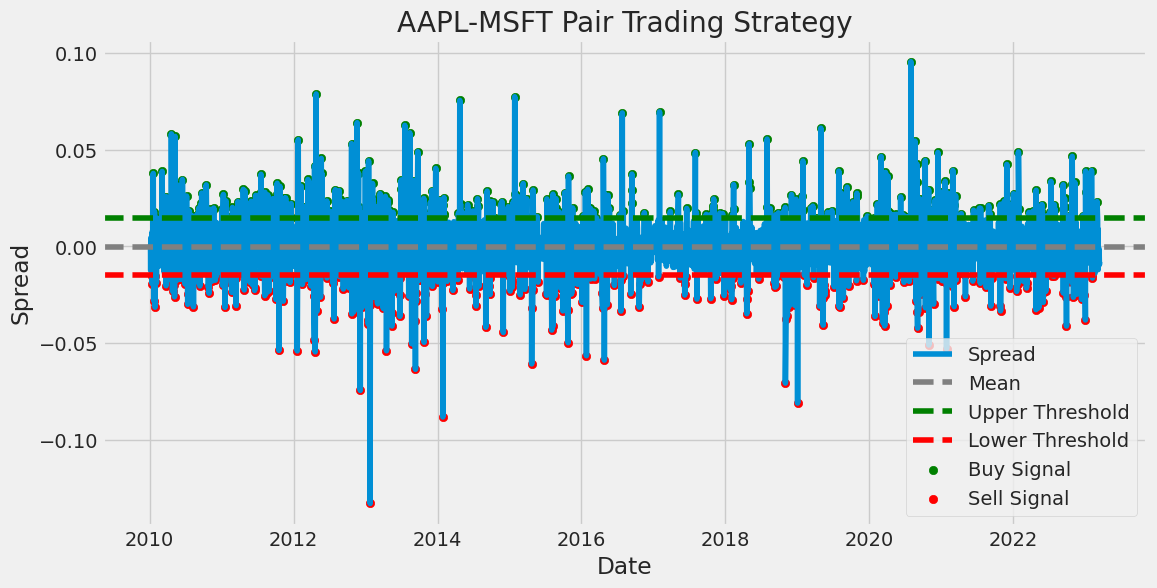

In [ ]:
#This code will plot the spread between the log returns of AAPL and MSFT,
#along with the mean, upper and lower thresholds, and the buy and sell signals.
#The buy signal is indicated with a green dot, and the sell signal is indicated with a red dot.
#You can customize the plot based on your specific preferences by changing the plot parameters.

import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Download historical price data
aapl = yf.download('AAPL', start='2010-01-01', end='2023-03-17')
msft = yf.download('MSFT', start='2010-01-01', end='2023-03-17')

# Preprocess data
aapl['log_returns'] = np.log(aapl['Close']) - np.log(aapl['Close'].shift(1))
msft['log_returns'] = np.log(msft['Close']) - np.log(msft['Close'].shift(1))

aapl['norm_returns'] = (aapl['Close'] - aapl['Close'].mean()) / aapl['Close'].std()
msft['norm_returns'] = (msft['Close'] - msft['Close'].mean()) / msft['Close'].std()

# Combine data
data = pd.DataFrame({'aapl': aapl['log_returns'], 'msft': msft['log_returns']}).dropna()

# Split data into training and testing sets
train_data = data.iloc[:-100, :]
test_data = data.iloc[-100:, :]

# Train machine learning model
model = LinearRegression()
model.fit(train_data['msft'].values.reshape(-1, 1), train_data['aapl'])

# Test model
y_pred = model.predict(test_data['msft'].values.reshape(-1, 1))
mse = mean_squared_error(test_data['aapl'], y_pred)
print('MSE:', mse)

# Implement trading strategy
spread = data['aapl'] - model.predict(data['msft'].values.reshape(-1, 1))
mean_spread = spread.mean()
std_spread = spread.std()

buy_signal = spread > (mean_spread + std_spread)
sell_signal = spread < (mean_spread - std_spread)

# Plot data and trading signals
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(spread.index, spread, label='Spread')
ax.axhline(y=mean_spread, color='gray', linestyle='--', label='Mean')
ax.axhline(y=mean_spread + std_spread, color='green', linestyle='--', label='Upper Threshold')
ax.axhline(y=mean_spread - std_spread, color='red', linestyle='--', label='Lower Threshold')

ax.scatter(spread[buy_signal].index, spread[buy_signal], color='green', label='Buy Signal')
ax.scatter(spread[sell_signal].index, spread[sell_signal], color='red', label='Sell Signal')

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Spread')
ax.set_title('AAPL-MSFT Pair Trading Strategy')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#read stock data from yahoo
import yfinance as yf

#tech stamps
tech_list = ['KOTAKBANK.NS', 'INDUSINDBK.NS', 'ICICIBANK.NS', 'HDFCLIFE.NS']

#set start and end times
end = '2023-7-13'
start = '2018-01-01'

# Download the stock data and rename the column to the company name
company_list = []
for stock in tech_list:
    data = yf.download(stock, start=start, end=end)
    data = data.rename(columns={'Adj Close': stock})
    company_list.append(data)

# Concatenate the dataframes
df = pd.concat(company_list, axis=1)

# Display the statistics of the dataframe
print(df.describe())



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
              Open         High          Low        Close  KOTAKBANK.NS  \
count  1366.000000  1366.000000  1366.000000  1366.000000   1366.000000   
mean   1587.185687  1605.275951  1567.084848  1586.661639   1585.182453   
std     288.160451   289.524667   286.400871   287.415728    287.856262   
min    1001.000000  1002.900024   992.500000   999.950012    997.804932   
25%    1320.324982  1336.549988  1303.124969  1319.912476   1318.442261   
50%    1675.375000  1689.774963  1661.099976  1675.524963   1673.830383   
75%    1827.775024  1848.612549  1808.500000  1827.212494   1826.037720   
max    2200.000000  2253.000000  2176.600098  2210.949951   2209.619629   

             Volume         Open         High   

In [ ]:
import pandas as pd
import yfinance as yf
from itertools import combinations

start = "2018-07-13"
end = "2023-05-17"

# Downloading the data
stock_list = ['KOTAKBANK.NS', 'INDUSINDBK.NS', 'ICICIBANK.NS', 'HDFCLIFE.NS']
for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)

# Creating a dictionary of dataframes for each stock
stocks = {}
for stock in stock_list:
    stocks[stock] = globals()[stock][['Adj Close']]

# Creating a list of all possible pairs
pairs = list(combinations(stock_list, 2))

# Creating an empty dataframe to store the results
results = pd.DataFrame(columns=['Pair', 'Mean Spread', 'Std Spread', 'Z Score'])

# Looping through each pair and calculating spread
for pair in pairs:
    stock1 = stocks[pair[0]]
    stock2 = stocks[pair[1]]
    spread = stock1 - stock2
    mean_spread = spread.mean().values[0]
    std_spread = spread.std().values[0]

    # Calculating the Z Score
    z_score = (mean_spread - spread) / std_spread
    z_score = z_score.dropna()

    # Adding the result to the dataframe
    results = pd.concat([results, pd.DataFrame({'Pair': [pair], 'Mean Spread': [mean_spread], 'Std Spread': [std_spread], 'Z Score': [z_score.max()]})], ignore_index=True)

# Finding the pair with the highest Z score
results['Max Z Score'] = results['Z Score'].apply(lambda x: x.max())
results['Max Z Score'] = pd.to_numeric(results['Max Z Score'])
best_pair = results.loc[results['Max Z Score'].idxmax()]

print('Best Pair:', best_pair['Pair'])
print('Mean Spread:', best_pair['Mean Spread'])
print('Std Spread:', best_pair['Std Spread'])
print('Max Z Score:', best_pair['Max Z Score'])




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Best Pair: ('KOTAKBANK.NS', 'INDUSINDBK.NS')
Mean Spread: 527.1473019033145
Std Spread: 478.7149110314772
Max Z Score: 2.5359802499153594


In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error


# Downloading the data
start = "2018-01-01"
end = "2023-07-13"
stock_list = ['KOTAKBANK.NS', 'INDUSINDBK.NS', 'ICICIBANK.NS', 'HDFCLIFE.NS']
df_dict = {}
for stock in stock_list:
    df = yf.download(stock, start, end)
    df_dict[stock] = df

# Creating a dictionary of dataframes for each stock
stocks = {}
for stock in stock_list:
    stocks[stock] = df_dict[stock][['Adj Close']]

# Creating a list of all possible pairs
pairs = [(stock1, stock2) for i, stock1 in enumerate(stock_list) for stock2 in stock_list[i+1:]]

# Creating an empty dataframe to store the results
results = pd.DataFrame(columns=['Pair', 'Mean Spread', 'Std Spread', 'Z Score'])

# Looping through each pair and calculating spread
for pair in pairs:
    stock1 = stocks[pair[0]]
    stock2 = stocks[pair[1]]
    spread = stock1 - stock2
    mean_spread = spread.mean().values[0]
    std_spread = spread.std().values[0]

    # Calculating the Z Score
    z_score = (mean_spread - spread) / std_spread
    z_score = z_score.dropna()

    # Adding the result to the dataframe
    results = results.append({'Pair': pair, 'Mean Spread': mean_spread, 'Std Spread': std_spread, 'Z Score': z_score.max()}, ignore_index=True)

# Finding the pair with the highest Z score
results['Max Z Score'] = results['Z Score'].apply(lambda x: x.max())
results['Max Z Score'] = pd.to_numeric(results['Max Z Score'])
best_pair = results.loc[results['Max Z Score'].idxmax()]['Pair']

# Prepare data for LSTM model
stock1 = df_dict[best_pair[0]]
stock2 = df_dict[best_pair[1]]
spread = stock1['Adj Close'] - stock2['Adj Close']
spread = spread.values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
spread = scaler.fit_transform(spread)

# Split data into training and testing sets
train_size = int(len(spread) * 0.7)
test_size = len(spread) - train_size
train_data, test_data = spread[0:train_size,:], spread[train_size:len(spread),:]

# Create data sets for LSTM model
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<ipython-input-3-b72e94285cc8>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Pair': pair, 'Mean Spread': mean_spread, 'Std Spread': std_spread, 'Z Score': z_score.max()}, ignore_index=True)
<ipython-input-3-b72e94285cc8>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Pair': pair, 'Mean Spread': mean_spread, 'Std Spread': std_spread, 'Z Score': z_score.max()}, ignore_index=True)
<ipython-input-3-b72e94285cc8>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Pair': pair, 'Mean Spread': mean_spread, 'Std Spread': std_spread, 'Z Score': z_score.max()}, ignore_index=True)
<ipython-input-3-b72e94285cc8>:44: FutureWarning: The frame.append met

13/13 [==============================] - 0s 2ms/step
Train Score: 409.77 RMSE
Test Score: 337.38 RMSE


In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error

window = 10

# Downloading the data
start = "2018-01-01"
end = "2023-11-27"
stock_list = ['KOTAKBANK.NS', 'INDUSINDBK.NS', 'ICICIBANK.NS', 'HDFCLIFE.NS']
df_dict = {}
for stock in stock_list:
    df = yf.download(stock, start, end)
    df_dict[stock] = df

# Creating a dictionary of dataframes for each stock
stocks = {}
for stock in stock_list:
    stocks[stock] = df_dict[stock][['Adj Close', 'Volume', 'Open', 'High', 'Low']]  # Include additional features

# Creating a list of all possible pairs
pairs = [(stock1, stock2) for i, stock1 in enumerate(stock_list) for stock2 in stock_list[i+1:]]

# Creating an empty dataframe to store the results
results = pd.DataFrame(columns=['Pair', 'Mean Spread', 'Std Spread', 'Z Score'])

# Looping through each pair and calculating spread
for pair in pairs:
    stock1 = stocks[pair[0]]
    stock2 = stocks[pair[1]]
    spread = stock1['Adj Close'] - stock2['Adj Close']
    mean_spread = spread.mean()
    std_spread = spread.std()

    # Calculating the Z Score
    z_score = (mean_spread - spread) / std_spread
    z_score = z_score.dropna()

    # Adding the result to the dataframe
    results = results.append({'Pair': pair, 'Mean Spread': mean_spread, 'Std Spread': std_spread, 'Z Score': z_score.max()}, ignore_index=True)

# Finding the pair with the highest Z score
results['Max Z Score'] = results['Z Score'].apply(lambda x: np.max(x))
results['Max Z Score'] = pd.to_numeric(results['Max Z Score'])
best_pair = results.loc[results['Max Z Score'].idxmax()]['Pair']

# Prepare data for LSTM model
stock1 = df_dict[best_pair[0]]
stock2 = df_dict[best_pair[1]]
spread = stock1['Adj Close'] - stock2['Adj Close']
spread = spread.values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
spread = scaler.fit_transform(spread)

# Split data into training and testing sets
train_size = int(len(spread) * 0.7)
test_size = len(spread) - train_size
train_data, test_data = spread[0:train_size, :], spread[train_size:len(spread), :]

# Create data sets for LSTM model
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(1, look_back), return_sequences=True))  # Add return_sequences=True for multiple LSTM layers
model.add(LSTM(units=32))  # Additional LSTM layer
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=1)

train_size = int(len(spread) * 0.7)
val_size = int(len(spread) * 0.1)
test_size = len(spread) - train_size - val_size

train_data = spread[0:train_size, :]
val_data = spread[train_size:train_size+val_size, :]
test_data = spread[train_size+val_size:len(spread), :]

trainX, trainY = create_dataset(train_data, look_back)
valX, valY = create_dataset(val_data, look_back)
testX, testY = create_dataset(test_data, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model.fit(trainX, trainY, epochs=150, batch_size=32, verbose=1, validation_data=(valX, valY))

# Create a time series cross-validator
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation
for train_index, val_index in tscv.split(spread):
    train_data = spread[train_index]
    val_data = spread[val_index]

    trainX, trainY = create_dataset(train_data, look_back)
    valX, valY = create_dataset(val_data, look_back)

    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))

    model.fit(trainX, trainY, epochs=150, batch_size=64, verbose=1, validation_data=(valX, valY))

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % trainScore)
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % testScore)

# Set your desired threshold for making buying or selling decisions
threshold = 2.0

# Get the Z-score of the best pair
best_z_score = results.loc[results['Max Z Score'].idxmax()]['Z Score']

# Determine the buying and selling decisions
buy_stock = best_pair[0] if best_z_score > threshold else best_pair[1]
sell_stock = best_pair[1] if best_z_score > threshold else best_pair[0]

# Print the buying and selling decisions
if buy_stock and sell_stock:
    print("Buy: ", buy_stock)
    print("Sell: ", sell_stock)
elif buy_stock:
    print("Buy: ", buy_stock)
elif sell_stock:
    print("Sell: ", sell_stock)
else:
    print("No Prediction is done")